In [39]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import copy
import os
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")
import sys
sys.path.append('../induction_motor_anomaly_detection/')
import modules,scaler


In [97]:

# Generate the signal
t = np.arange(0, 1, 1/1000)  # time vector
x = np.sin(2*np.pi*100*t) + np.sin(2*np.pi*200*t)  # signal

# Compute the DFT
X = np.fft.fft(x)
freq = np.fft.fftfreq(len(x), 1/1000)  # frequency vector


In [98]:
freq

array([   0.,    1.,    2.,    3.,    4.,    5.,    6.,    7.,    8.,
          9.,   10.,   11.,   12.,   13.,   14.,   15.,   16.,   17.,
         18.,   19.,   20.,   21.,   22.,   23.,   24.,   25.,   26.,
         27.,   28.,   29.,   30.,   31.,   32.,   33.,   34.,   35.,
         36.,   37.,   38.,   39.,   40.,   41.,   42.,   43.,   44.,
         45.,   46.,   47.,   48.,   49.,   50.,   51.,   52.,   53.,
         54.,   55.,   56.,   57.,   58.,   59.,   60.,   61.,   62.,
         63.,   64.,   65.,   66.,   67.,   68.,   69.,   70.,   71.,
         72.,   73.,   74.,   75.,   76.,   77.,   78.,   79.,   80.,
         81.,   82.,   83.,   84.,   85.,   86.,   87.,   88.,   89.,
         90.,   91.,   92.,   93.,   94.,   95.,   96.,   97.,   98.,
         99.,  100.,  101.,  102.,  103.,  104.,  105.,  106.,  107.,
        108.,  109.,  110.,  111.,  112.,  113.,  114.,  115.,  116.,
        117.,  118.,  119.,  120.,  121.,  122.,  123.,  124.,  125.,
        126.,  127.,

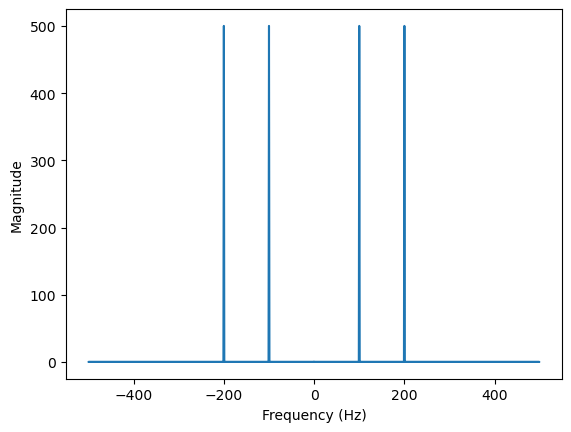

In [73]:

# Plot the frequency spectrum
plt.plot(freq, np.abs(X))
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.show()


In [99]:
data = pd.read_csv('../data/combined_data.csv')

In [100]:
df = copy.deepcopy(data)

In [42]:
df.head()

,current_1,current_2,current_3
0,2040,2361,38
1,2031,2365,52
2,2031,2370,53
3,2025,2372,54
4,2023,2379,54


In [101]:
fft_df = np.fft.fft(df)

In [102]:
freq = np.fft.fftfreq(len(df), 1/10000)

In [115]:
freq[0:250],freq[-250:]

array([-0.78864353, -0.78233438, -0.77602524, -0.76971609, -0.76340694,
       -0.75709779, -0.75078864, -0.7444795 , -0.73817035, -0.7318612 ,
       -0.72555205, -0.7192429 , -0.71293375, -0.70662461, -0.70031546,
       -0.69400631, -0.68769716, -0.68138801, -0.67507886, -0.66876972,
       -0.66246057, -0.65615142, -0.64984227, -0.64353312, -0.63722397,
       -0.63091483, -0.62460568, -0.61829653, -0.61198738, -0.60567823,
       -0.59936909, -0.59305994, -0.58675079, -0.58044164, -0.57413249,
       -0.56782334, -0.5615142 , -0.55520505, -0.5488959 , -0.54258675,
       -0.5362776 , -0.52996845, -0.52365931, -0.51735016, -0.51104101,
       -0.50473186, -0.49842271, -0.49211356, -0.48580442, -0.47949527,
       -0.47318612, -0.46687697, -0.46056782, -0.45425868, -0.44794953,
       -0.44164038, -0.43533123, -0.42902208, -0.42271293, -0.41640379,
       -0.41009464, -0.40378549, -0.39747634, -0.39116719, -0.38485804,
       -0.3785489 , -0.37223975, -0.3659306 , -0.35962145, -0.35

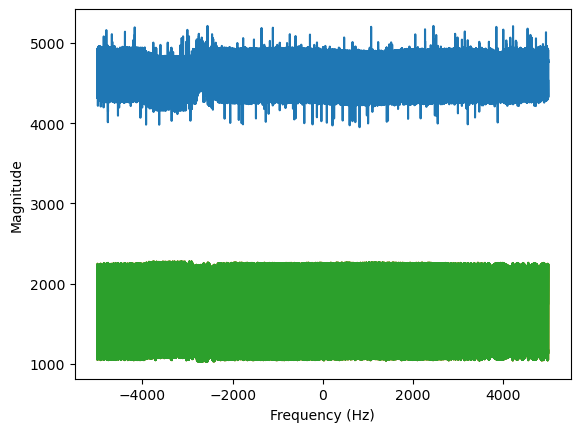

In [94]:

# Plot the frequency spectrum
plt.plot(freq[0:250], np.abs(fft_df[0:500,0:1]))
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.show()

In [67]:
fft2_df = np.fft.fftn(df)

In [71]:
fft_df[0]

array([4439.    +0.j        ,  840.5-2011.77701299j,
        840.5+2011.77701299j])

In [70]:
fft2_df[0]

array([9202527.       +0.j        , 1364314.5-3001508.08352847j,
       1364314.5+3001508.08352847j])

In [64]:
fft2_df[0]

array([9202527.       +0.j        , 1364314.5-3001508.08352847j,
       1364314.5+3001508.08352847j])

In [44]:
type(fft_df)

numpy.ndarray

In [45]:
len(fft_df)

2000

In [46]:
fft_df_pd = pd.DataFrame(data=fft_df,columns=df.columns)

In [55]:
fft_df_pd['current_1'][0:1000]

0      4439.0+0.0j
1      4448.0+0.0j
2      4454.0+0.0j
3      4451.0+0.0j
4      4456.0+0.0j
          ...     
995    4655.0+0.0j
996    4653.0+0.0j
997    4655.0+0.0j
998    4660.0+0.0j
999    4650.0+0.0j
Name: current_1, Length: 1000, dtype: complex128

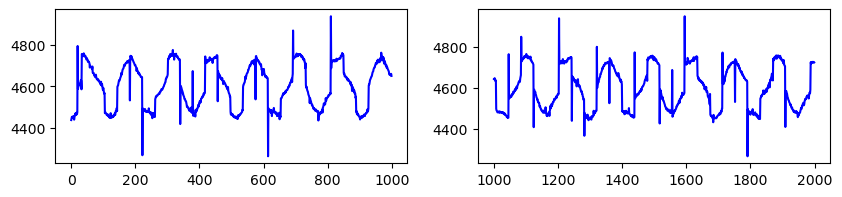

In [61]:
plt.figure(figsize=(10,2))
plt.subplot(1,2,1)
plt.plot(fft_df_pd['current_1'][0:1000],'b',label='fft')
plt.subplot(1,2,2)
plt.plot(fft_df_pd['current_1'][1000:2000],'b',label='fft')

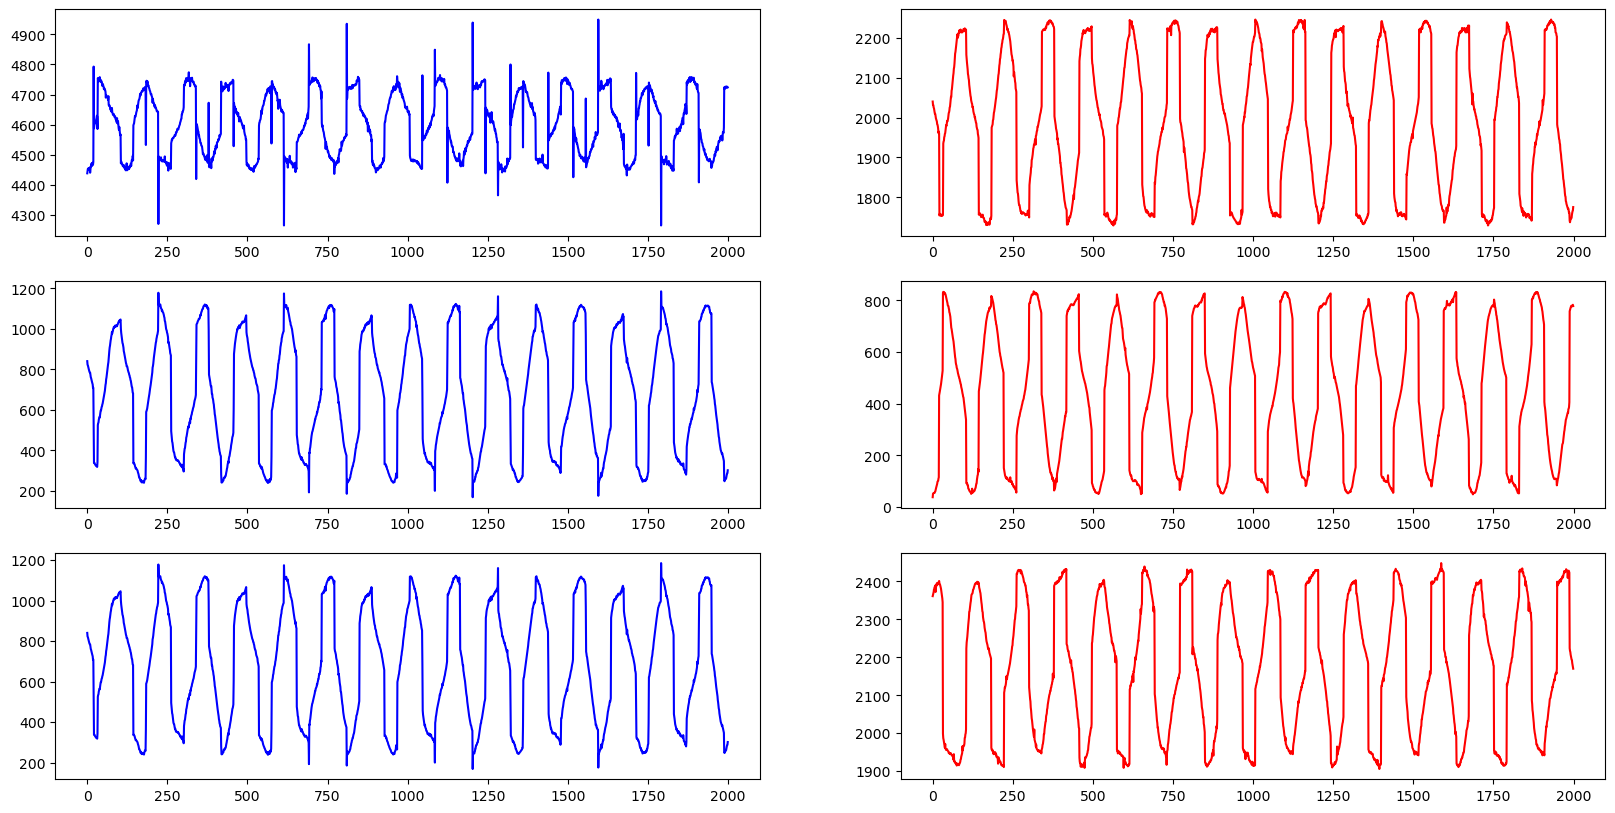

In [47]:
plt.figure(figsize=(20,10))
plt.subplot(3,2,1)
plt.plot(fft_df_pd['current_1'],'b',label='fft')
plt.subplot(3,2,3)
plt.plot(fft_df_pd['current_3'],'b',label='fft')
plt.subplot(3,2,5)
plt.plot(fft_df_pd['current_2'],'b',label='fft')
plt.subplot(3,2,2)
plt.plot(df['current_1'],'r',label='normal')
plt.subplot(3,2,4)
plt.plot(df['current_3'],'r',label='normal')
plt.subplot(3,2,6)
plt.plot(df['current_2'],'r',label='normal')

In [ ]:
# the readings are being measured at 10000 records per second. So Sampling rate is 10000
# assume frequency of connected power supply be 50Hz.


In [118]:
#  Let's say we have a simple audio signal consisting of a 1 kHz 
# sine wave with an amplitude of 1, sampled at a rate of 44.1 kHz 
# (i.e., 44,100 samples per second).
#  The time-domain representation of this signal would look like a sine wave oscillating at 1 kHz:

#    |    .         
#    |  .   .       
#    | .     .      
#    |.       .     
# ___|_________.____
#    0      1/44100 s

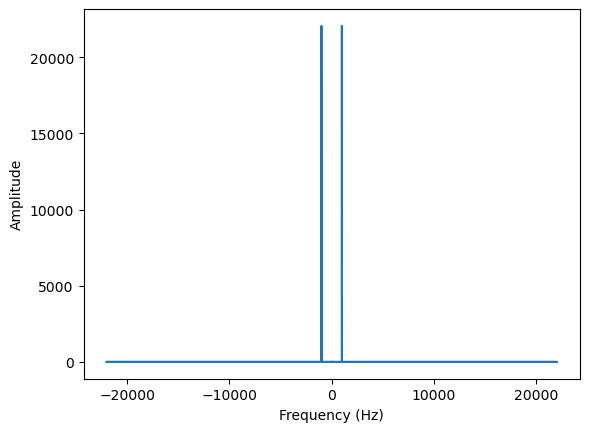

In [116]:
import numpy as np
import matplotlib.pyplot as plt

# generate a 1 kHz sine wave with an amplitude of 1, sampled at 44.1 kHz
fs = 44100
t = np.linspace(0, 1, fs, endpoint=False)
x = np.sin(2 * np.pi * 1000 * t)

# apply the FFT
fft_output = np.fft.fft(x)

# plot the frequency-domain representation of the signal
freqs = np.fft.fftfreq(len(x), 1/fs)
plt.plot(freqs, np.abs(fft_output))
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.show()
